## 퍼셉트론
- 활성화 함수

### 행렬의 연산

In [6]:
import numpy as np

grade = 10
test = 20

input0 = np.array([grade, test])

w1 = np.array(
    [[0.5, 0.12],
    [0.3, 0.4]]
)

w2 = np.array([[0.4], [0.5]])

result0 = np.dot(input0, w1)
result1 = np.dot(result0, w2)
print(result0)
print(result1)

[11.   9.2]
[9.]


### step 함수(기본 활성화 함수)

In [12]:
def step(h):
    return np.array(h>=0, dtype="int") # 0을 넘기면 int를 반환

In [13]:
a0 = np.array([1, 2, 3, 4])
step(a0)

array([1, 1, 1, 1])

이전에 작성한 네트워크에 활성화 함수를 대입해보자

In [14]:
result0 = np.dot(input0, w1)
result0 = step(result0)
result1 = np.dot(result0, w2)
result1 = step(result1)
print(result0)
print(result1)

[1 1]
[1]


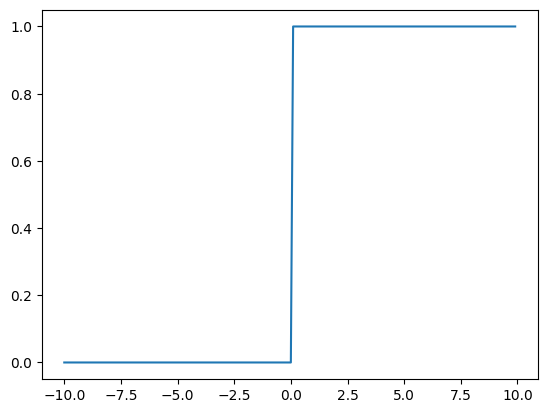

In [17]:
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 0.1)
y = step(x)
plt.plot(x, y)


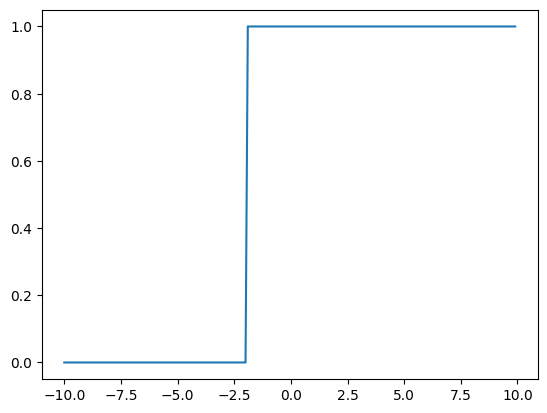

In [18]:
bias = 2
x = np.arange(-10, 10, 0.1)
y = step(x + bias)
plt.plot(x, y)

### 퍼셉트론을 활용한 비트연산

In [55]:
# and 연산
def _and(a, b):
    w1 = .25
    w2 =  .25
    bias = -.5
    y = w1 * a + w2 * b + bias
    result = step(y)
    return result
        
inputs = [[1, 1],
          [1, 0],
          [0, 1],
          [0, 0]]

for a, b in inputs:
    result = _and(a, b)
    print(f'{a} and {b} = {result}')

1 and 1 = 1
1 and 0 = 0
0 and 1 = 0
0 and 0 = 0


In [53]:
# or 연산
def _or(a, b):
    w1 = .25
    w2 =  .25
    bias = -.25
    y = w1 * a + w2 * b + bias
    result = step(y)
    return result

inputs = [[1, 1], # 1
          [1, 0], # 1
          [0, 1], # 1
          [0, 0]] # 0

for a, b in inputs:
    result = _or(a, b)
    print(f'{a} and {b} = {result}')

1 and 1 = 1
1 and 0 = 1
0 and 1 = 1
0 and 0 = 0


In [56]:
# not 연산
def _not(x):
    return np.array(~(x == 1), dtype='int')
    
x = np.array([1, 0, 1, 0])

_not(x)


array([0, 1, 0, 1])

In [58]:
# xor
def _xor():
    return _and(_not(_and(a, b)), _or(a, b))
    
inputs = [[1, 1], # 1
          [1, 0], # 1
          [0, 1], # 1
          [0, 0]] # 0

for a, b in inputs:
    result = _or(a, b)
    print(f'{a} and {b} = {result}')

1 and 1 = 1
1 and 0 = 1
0 and 1 = 1
0 and 0 = 0


C:\Users\csjty\AppData\Local\Temp\ipykernel_29964\118426689.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x>0, dtype=np.int)


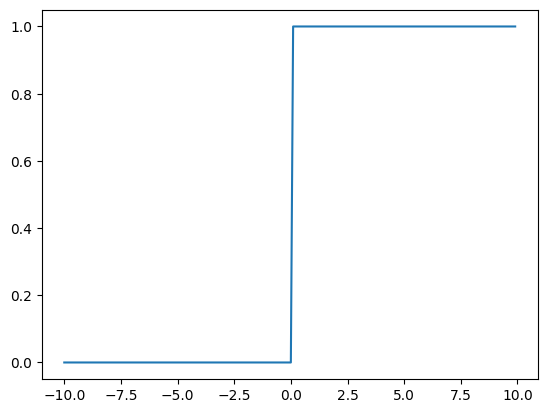

In [59]:
def step_function(x):
    return np.array(x>0, dtype=np.int)

X = np.arange(-10, 10, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.show()

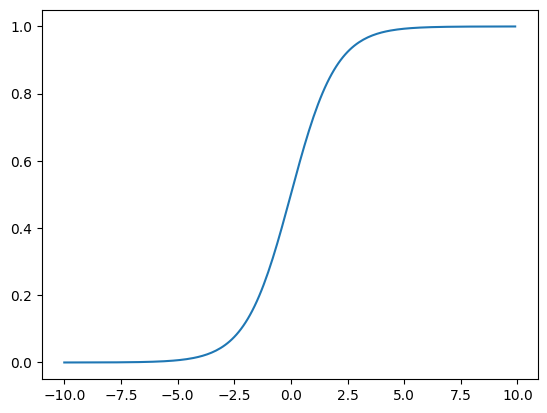

In [61]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X = np.arange(-10, 10, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.show()

## 활성화 함수와 신경망 구현
### sigmoid 함수

In [63]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

sigmoid(4)

0.9820137900379085

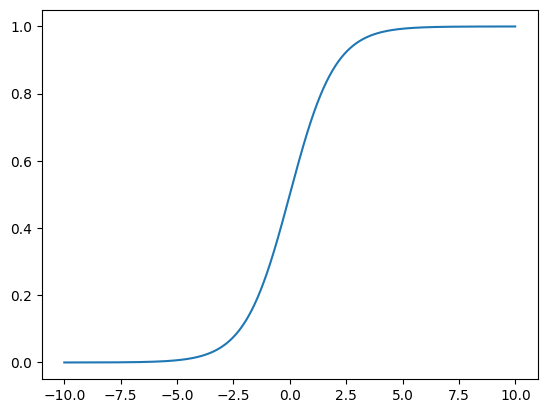

In [64]:
X = np.arange(-10, 10, 0.01)
y = sigmoid(X)
plt.plot(X, y)

### ReLU 함수
- 입력이 0을 넘으면 그대로 출력, 0 이하면 0을 출력
- 시그모이드의 결과는 1에 무한히 가까워지므로 아주 크거나 아주 작은 값의 오차를 측정하기 어려움

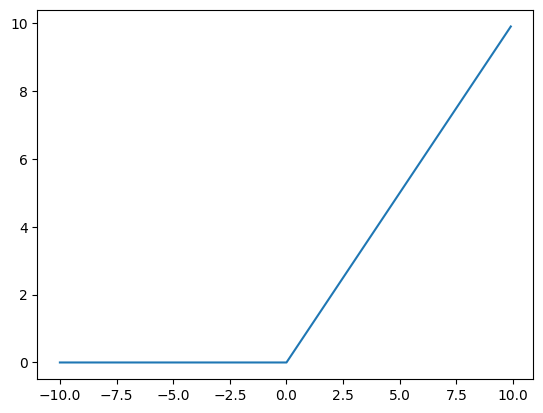

In [65]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-10, 10, 0.1)
y = relu(x)
plt.plot(x, y)


### 신경망 구하기
Numpy를 사용하여 2개의 입력 노드와 1개의 출력 노드가 있는 간단한 네트워크의 출력을 Sigmoid 활성화 함수로 계산하는 코드를 구성하라
- 입력값은 [0.5, -0.3], 가중치는 [0.4, 0.6], 편향값은 -0.5
- ndarray의 곱셈은 np.dot으로 연산
- 시그모이드 함수를 구현 (Numpy의 지수 함수 np.exp를 사용)
- 네트워크 출력을 계산
- 최종 출력은 0.382252125230751이어야 함.

In [71]:
inputs = np.array([0.5, -0.3])
weights = np.array([0.4, 0.6])
bias = -0.5

y = sigmoid(np.dot(inputs, weights.T) + bias)
print(y)

0.382252125230751


다층 신경망도 구성해보자

In [72]:
inputs = [1.0, 0.5] # 1x2 행렬
w1 = np.array([[0.1, 0.2, 0.3], [0.2, 0.3, 0.4]]) # 2x3 행렬
b1 = np.array([0.2, 0.3, 0.4]) # 3개 노드
w2 = np.array([[0.1, 0.2], [0.3, 0.2], [0.3, 0.4]]) # 3x2행렬
b2 = np.array([0.1, 0.2]) # 2개 노드
w3 = np.array([[0.1, 0.2], [0.3, 0.4]]) # 2x2행렬
b3 = np.array([0.1, 0.2]) # 2개 노드

# 신경망 구성 (포워딩)
l1_output = np.dot(inputs, w1) + b1
l1_y = sigmoid(l1_output)
l2_output = np.dot(l1_y, w2) + b2
l2_y = sigmoid(l2_output)
l3_output = np.dot(l2_y, w3) + b3
# 마지막 레이어에서는 경우에 따라서 다른 활성화 함수를 쓰거나 쓰지 않는 경우도 있음
l3_y = sigmoid(l3_output)
print(l3_y)

[0.59065816 0.64523766]


### 소프트 맥스 함수 구현하기

In [73]:
def origin_softmax(x):
    f_x = np.exp(x) / np.sum(np.exp(x))
    return f_x

x = np.array([1.3, 5.1, 2.2, 0.7, 1.1])
softmax_x = origin_softmax(x)
softmax_x

array([0.02019046, 0.90253769, 0.04966053, 0.01108076, 0.01653055])

In [74]:
np.sum(softmax_x) # 소프트맥스의 총 합은 0이다.

1.0

계산이 불가능한 숫자를 넣어보자.

In [75]:
x = np.array([10000, 10, 99999, 1, 2])
softmax_x = origin_softmax(x)
softmax_x

C:\Users\csjty\AppData\Local\Temp\ipykernel_29964\3339709200.py:2: RuntimeWarning: overflow encountered in exp
  f_x = np.exp(x) / np.sum(np.exp(x))
C:\Users\csjty\AppData\Local\Temp\ipykernel_29964\3339709200.py:2: RuntimeWarning: invalid value encountered in divide
  f_x = np.exp(x) / np.sum(np.exp(x))


array([nan,  0., nan,  0.,  0.])

따라서 소프트맥스에 입력되는 조금이라도 크면 연산이 불가능하다. 따라서 입력된 값을 일괄적으로 낮춰주는 작업이 필요하다.

In [76]:
def softmax(x):
    x = x - np.max(x) # x의 최대값을 모든 항에서 감산한다.
    f_x = np.exp(x) / np.sum(np.exp(x))
    return f_x

x = np.array([10000, 10, 99999, 1, 2])
softmax_x = softmax(x)
softmax_x

array([0., 0., 1., 0., 0.])

### MNIST 필기체 데이터셋으로 소프트맥스 함수 출력 결과 확인하기


In [81]:
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, t_train), (x_test, t_test) = mnist.load_data()

print(x_train.shape)
print(t_train.shape)

(60000, 28, 28)
(60000,)


Text(0.5, 1.0, '5')

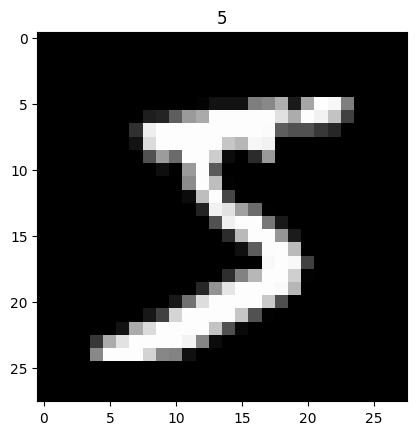

In [84]:
plt.imshow(x_train[0], cmap='gray')
plt.title(t_train[0])

In [87]:
x = x_train[0]
# x.flatten('F')
x.flatten()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [88]:
x = x_train[0]
x = x.flatten()/255
x.shape

(784,)

In [89]:
y = np.array([0,0,0,0,0,1,0,0,0,0])
y.argmax()

5

이 데이터를 전달할 신경망을 구성해보자

In [90]:
inputs = x
w1 = np.arange(0.0001, 0.2353, 0.0001).reshape(784, 3) # 2352
b1 = np.array([0.2, 0.3, 0.4]) # 노드 3개
w2 = np.array([[0.1, 0.2], [0.3, 0.2], [0.3, 0.4]])
b2 = np.array([0.2, 0.3]) # 노드 2개
w3 = np.array([[0.1, 0.2, 0.3, 0.4, 0.1, ]])